In [ ]:
import pandas as pd

# Wahlrecht.de - Forsa şirketinin anketleri (HTML sayfası)
url = "https://www.wahlrecht.de/umfragen/forsa.htm"

try:
    # Sayfadaki tüm tabloları bir liste olarak çeker.
    # decimal=',' ve thousands='.' ayarları Alman formatını okumak için kritik!
    tables = pd.read_html(url, decimal=',', thousands='.')

    # Almanya anket verisi genellikle listelenen ilk (index 0) veya ikinci (index 1) büyük tablodur.
    # Muhtemelen 1. index (tables[1]) sana ana veriyi verecektir.
    df_forsa = tables[1]

    print("✅ Forsa Anket Verisi (Almanya) başarıyla çekildi!")
    print("\nÇekilen Tablonun İlk 5 Satırı:")
    print(df_forsa.head())

    # CSV Olarak Kaydet (Bir sonraki adımda temizlemek için)
    df_forsa.to_csv("forsa_polls_germany_raw.csv", index=False)

except Exception as e:
    print(f"❌ Tablo çekilirken hata oluştu: {e}")

✅ Forsa Anket Verisi (Almanya) başarıyla çekildi!

Çekilen Tablonun İlk 5 Satırı:
  Unnamed: 0 Unnamed: 1 CDU/CSU   SPD GRÜNE  FDP LINKE   AfD FW  BSW Sonstige  \
0   25112025        NaN    25 %  14 %  12 %  3 %  11 %  26 %  –  3 %      6 %   
1   18112025        NaN    25 %  14 %  12 %  3 %  11 %  26 %  –    –      9 %   
2   11112025        NaN    24 %  14 %  12 %  3 %  11 %  26 %  –  3 %      7 %   
3   04112025        NaN    24 %  14 %  12 %  3 %  12 %  26 %  –  3 %      6 %   
4   28102025        NaN    25 %  13 %  12 %  3 %  12 %  26 %  –  3 %      6 %   

  Unnamed: 11 Nichtwähler/ Unentschl. Befragte       Zeitraum  
0         NaN                    26 %     2501  18.11.–24.11.  
1         NaN                    25 %     2502  11.11.–17.11.  
2         NaN                    24 %     2503  04.11.–10.11.  
3         NaN                    23 %     2500  28.10.–03.11.  
4         NaN                    23 %     2502  21.10.–27.10.  


In [ ]:
pip install eurostat

In [ ]:
import pandas as pd
import os

def process_migration_data(input_file, output_file):
    # Check if input file exists
    if not os.path.exists(input_file):
        print(f"Error: The file '{input_file}' was not found.")
        return

    try:
        print(f"Reading {input_file}...")
        df = pd.read_csv(input_file)

        # distinct columns needed based on your request and the file snippet
        # geo = Country Code
        # TIME_PERIOD = Time Period
        # OBS_VALUE = Observation Value
        required_columns = ['geo', 'TIME_PERIOD', 'OBS_VALUE']

        # Check if columns exist
        missing_cols = [col for col in required_columns if col not in df.columns]
        if missing_cols:
            print(f"Error: The following columns were not found in the CSV: {missing_cols}")
            return

        # Extract only the necessary columns
        extracted_df = df[required_columns].copy()

        # --- Handling Missing Values ---

        # 1. Ensure OBS_VALUE is numeric.
        # Sometimes statistical data uses symbols like ":" or "b" for missing/break in series.
        # errors='coerce' turns these non-numeric values into NaN (Not a Number)
        extracted_df['OBS_VALUE'] = pd.to_numeric(extracted_df['OBS_VALUE'], errors='coerce')

        # 2. Check for missing values
        initial_count = len(extracted_df)
        missing_count = extracted_df['OBS_VALUE'].isna().sum()

        if missing_count > 0:
            print(f"Found {missing_count} rows with missing or invalid Observation Values.")

            # Option A: Drop rows with missing values (Selected approach)
            extracted_df = extracted_df.dropna(subset=['OBS_VALUE'])
            print("Dropped rows with missing values.")

            # Option B: Fill with 0 (Alternative - commented out)
            # extracted_df['OBS_VALUE'] = extracted_df['OBS_VALUE'].fillna(0)
        else:
            print("No missing values found.")

        # Aggregate OBS_VALUE for unique geo and TIME_PERIOD combinations
        # This handles cases where multiple entries exist for the same period and country.
        extracted_df = extracted_df.groupby(['geo', 'TIME_PERIOD'], as_index=False)['OBS_VALUE'].sum()
        print("Aggregated duplicate entries for 'geo' and 'TIME_PERIOD'.")

        # Sort by Time and Geo for better readability
        extracted_df = extracted_df.sort_values(by=['geo', 'TIME_PERIOD'])

        # Save to new CSV
        extracted_df.to_csv(output_file, index=False)

        print(f"\nSuccess! Processed data saved to '{output_file}'")
        print(f"Original rows before aggregation: {initial_count}")
        print(f"Final rows after processing and aggregation: {len(extracted_df)}")
        print("\nFirst 5 rows of the new file:")
        print(extracted_df.head())

    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    # Input filename based on your upload
    input_csv = 'migr_asyappctzm__custom_19122438_linear_2_0.csv'

    # Output filename
    output_csv = 'processed_migration_data.csv'

    process_migration_data(input_csv, output_csv)

Reading migr_asyappctzm__custom_19122438_linear_2_0.csv...
No missing values found.
Aggregated duplicate entries for 'geo' and 'TIME_PERIOD'.

Success! Processed data saved to 'processed_migration_data.csv'
Original rows before aggregation: 5064
Final rows after processing and aggregation: 518

First 5 rows of the new file:
  geo TIME_PERIOD  OBS_VALUE
0  DE     2015-01      99565
1  DE     2015-02     103520
2  DE     2015-03     127720
3  DE     2015-04     109105
4  DE     2015-05     105395


In [ ]:
import pandas as pd
import os

def process_unemployment_data(input_file, output_file):
    # Check if input file exists
    if not os.path.exists(input_file):
        print(f"Error: The file '{input_file}' was not found.")
        return

    try:
        print(f"Reading {input_file}...")
        df = pd.read_csv(input_file)

        # distinct columns needed based on your request and the file snippet
        # geo = Country Code
        # TIME_PERIOD = Time Period
        # OBS_VALUE = Observation Value
        required_columns = ['geo', 'TIME_PERIOD', 'OBS_VALUE']

        # Check if columns exist
        missing_cols = [col for col in required_columns if col not in df.columns]
        if missing_cols:
            print(f"Error: The following columns were not found in the CSV: {missing_cols}")
            return

        # Extract only the necessary columns
        extracted_df = df[required_columns].copy()

        # --- Handling Missing Values ---

        # 1. Ensure OBS_VALUE is numeric.
        # Sometimes statistical data uses symbols like ":" or "b" for missing/break in series.
        # errors='coerce' turns these non-numeric values into NaN (Not a Number)
        extracted_df['OBS_VALUE'] = pd.to_numeric(extracted_df['OBS_VALUE'], errors='coerce')

        # 2. Check for missing values
        initial_count = len(extracted_df)
        missing_count = extracted_df['OBS_VALUE'].isna().sum()

        if missing_count > 0:
            print(f"Found {missing_count} rows with missing or invalid Observation Values.")

            # Option A: Drop rows with missing values (Selected approach)
            extracted_df = extracted_df.dropna(subset=['OBS_VALUE'])
            print("Dropped rows with missing values.")

            # Option B: Fill with 0 (Alternative - commented out)
            # extracted_df['OBS_VALUE'] = extracted_df['OBS_VALUE'].fillna(0)
        else:
            print("No missing values found.")

        # Sort by Time and Geo for better readability
        extracted_df = extracted_df.sort_values(by=['geo', 'TIME_PERIOD'])

        # Save to new CSV
        extracted_df.to_csv(output_file, index=False)

        print(f"\nSuccess! Processed data saved to '{output_file}'")
        print(f"Original rows: {initial_count}")
        print(f"Final rows: {len(extracted_df)}")
        print("\nFirst 5 rows of the new file:")
        print(extracted_df.head())

    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    # Input filename based on your new upload
    input_csv = 'une_rt_m_page_linear_2_0.csv'

    # Output filename
    output_csv = 'processed_unemployment_data.csv'

    process_unemployment_data(input_csv, output_csv)

Reading une_rt_m_page_linear_2_0.csv...
No missing values found.

Success! Processed data saved to 'processed_unemployment_data.csv'
Original rows: 517
Final rows: 517

First 5 rows of the new file:
  geo TIME_PERIOD  OBS_VALUE
0  DE     2015-01        4.5
1  DE     2015-02        4.5
2  DE     2015-03        4.5
3  DE     2015-04        4.4
4  DE     2015-05        4.4


In [5]:
import pandas as pd
import os

def process_hicp_data(input_file, output_file):
    # Check if input file exists
    if not os.path.exists(input_file):
        print(f"Error: The file '{input_file}' was not found.")
        return

    try:
        print(f"Reading {input_file}...")
        df = pd.read_csv(input_file)

        # distinct columns needed based on your request
        # geo = Country Code
        # TIME_PERIOD = Time Period
        # OBS_VALUE = Observation Value
        required_columns = ['geo', 'TIME_PERIOD', 'OBS_VALUE']

        # Check if columns exist
        missing_cols = [col for col in required_columns if col not in df.columns]
        if missing_cols:
            print(f"Error: The following columns were not found in the CSV: {missing_cols}")
            return

        # Extract only the necessary columns
        extracted_df = df[required_columns].copy()

        # --- Handling Missing Values ---

        # 1. Ensure OBS_VALUE is numeric.
        # errors='coerce' turns non-numeric values (like ':') into NaN
        extracted_df['OBS_VALUE'] = pd.to_numeric(extracted_df['OBS_VALUE'], errors='coerce')

        # 2. Check for missing values
        initial_count = len(extracted_df)
        missing_count = extracted_df['OBS_VALUE'].isna().sum()

        if missing_count > 0:
            print(f"Found {missing_count} rows with missing or invalid Observation Values.")

            # Drop rows with missing values
            extracted_df = extracted_df.dropna(subset=['OBS_VALUE'])
            print("Dropped rows with missing values.")
        else:
            print("No missing values found.")

        # --- Handle Duplicate Entries ---
        # The user reported that one month is printed three times and wants only the 'first' value.
        # This implies that for each unique combination of 'geo' and 'TIME_PERIOD',
        # we should keep only one 'OBS_VALUE'.
        # 'keep='first'' will keep the first occurrence of a duplicate based on the original order.
        initial_rows_after_na = len(extracted_df)
        extracted_df = extracted_df.drop_duplicates(subset=['geo', 'TIME_PERIOD'], keep='first')
        duplicates_dropped_count = initial_rows_after_na - len(extracted_df)
        if duplicates_dropped_count > 0:
            print(f"Dropped {duplicates_dropped_count} duplicate rows, keeping the first observation for each 'geo' and 'TIME_PERIOD'.")
        else:
            print("No duplicate 'geo' and 'TIME_PERIOD' combinations found.")

        # Sort by Time and Geo for better readability
        extracted_df = extracted_df.sort_values(by=['geo', 'TIME_PERIOD'])

        # Save to new CSV
        extracted_df.to_csv(output_file, index=False)

        print(f"\nSuccess! Processed data saved to '{output_file}'")
        print(f"Original rows: {initial_count}")
        print(f"Final rows after processing and removing duplicates: {len(extracted_df)}")
        print("\nFirst 5 rows of the new file:")
        print(extracted_df.head())

    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    # Input filename based on your upload
    input_csv = 'hicp_data_raw.csv'

    # Output filename
    output_csv = 'processed_hicp_data.csv'

    process_hicp_data(input_csv, output_csv)


Reading hicp_data_raw.csv...
No missing values found.
Dropped 1040 duplicate rows, keeping the first observation for each 'geo' and 'TIME_PERIOD'.

Success! Processed data saved to 'processed_hicp_data.csv'
Original rows: 1560
Final rows after processing and removing duplicates: 520

First 5 rows of the new file:
  geo TIME_PERIOD  OBS_VALUE
0  DE     2015-01      114.8
1  DE     2015-02      115.9
2  DE     2015-03      116.6
3  DE     2015-04      117.3
4  DE     2015-05      117.7


# Task
Update the asylum data processing code to retain only the first observation for each 'geo' and 'TIME_PERIOD' combination by using `drop_duplicates(subset=['geo', 'TIME_PERIOD'], keep='first')` instead of `groupby().sum()`. The input file is `migr_asyappctzm__custom_19122438_linear_2_0.csv` and the output file should be `processed_migration_data.csv`. Then, summarize the output, indicating successful processing and expected format.

## Adjust Asylum Data Processing

### Subtask:
Update the asylum data processing code to retain only the first observation for each 'geo' and 'TIME_PERIOD' combination by using `drop_duplicates(subset=['geo', 'TIME_PERIOD'], keep='first')` instead of `groupby().sum()`. The input file is `migr_asyappctzm__custom_19122438_linear_2_0.csv` and the output file should be `processed_migration_data.csv`.


**Reasoning**:
The subtask requires modifying the `process_migration_data` function to use `drop_duplicates` instead of `groupby().sum()` for handling duplicate entries. I will update the code in the identified cell to reflect this change and then execute it to process the asylum data.



In [6]:
import pandas as pd
import os

def process_migration_data(input_file, output_file):
    # Check if input file exists
    if not os.path.exists(input_file):
        print(f"Error: The file '{input_file}' was not found.")
        return

    try:
        print(f"Reading {input_file}...")
        df = pd.read_csv(input_file)

        # distinct columns needed based on your request and the file snippet
        # geo = Country Code
        # TIME_PERIOD = Time Period
        # OBS_VALUE = Observation Value
        required_columns = ['geo', 'TIME_PERIOD', 'OBS_VALUE']

        # Check if columns exist
        missing_cols = [col for col in required_columns if col not in df.columns]
        if missing_cols:
            print(f"Error: The following columns were not found in the CSV: {missing_cols}")
            return

        # Extract only the necessary columns
        extracted_df = df[required_columns].copy()

        # --- Handling Missing Values ---

        # 1. Ensure OBS_VALUE is numeric.
        # Sometimes statistical data uses symbols like ":" or "b" for missing/break in series.
        # errors='coerce' turns these non-numeric values into NaN (Not a Number)
        extracted_df['OBS_VALUE'] = pd.to_numeric(extracted_df['OBS_VALUE'], errors='coerce')

        # 2. Check for missing values
        initial_count = len(extracted_df)
        missing_count = extracted_df['OBS_VALUE'].isna().sum()

        if missing_count > 0:
            print(f"Found {missing_count} rows with missing or invalid Observation Values.")

            # Option A: Drop rows with missing values (Selected approach)
            extracted_df = extracted_df.dropna(subset=['OBS_VALUE'])
            print("Dropped rows with missing values.")

            # Option B: Fill with 0 (Alternative - commented out)
            # extracted_df['OBS_VALUE'] = extracted_df['OBS_VALUE'].fillna(0)
        else:
            print("No missing values found.")

        # Aggregate OBS_VALUE for unique geo and TIME_PERIOD combinations
        # This handles cases where multiple entries exist for the same period and country.
        # extracted_df = extracted_df.groupby(['geo', 'TIME_PERIOD'], as_index=False)['OBS_VALUE'].sum()
        # print("Aggregated duplicate entries for 'geo' and 'TIME_PERIOD'.")

        # Use drop_duplicates as per the subtask instruction
        initial_rows_after_na = len(extracted_df)
        extracted_df = extracted_df.drop_duplicates(subset=['geo', 'TIME_PERIOD'], keep='first')
        duplicates_dropped_count = initial_rows_after_na - len(extracted_df)
        if duplicates_dropped_count > 0:
            print(f"Dropped {duplicates_dropped_count} duplicate rows, keeping the first observation for each 'geo' and 'TIME_PERIOD'.")
        else:
            print("No duplicate 'geo' and 'TIME_PERIOD' combinations found.")

        # Sort by Time and Geo for better readability
        extracted_df = extracted_df.sort_values(by=['geo', 'TIME_PERIOD'])

        # Save to new CSV
        extracted_df.to_csv(output_file, index=False)

        print(f"\nSuccess! Processed data saved to '{output_file}'")
        print(f"Original rows before processing: {initial_count}")
        print(f"Final rows after processing and removing duplicates: {len(extracted_df)}")
        print("\nFirst 5 rows of the new file:")
        print(extracted_df.head())

    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    # Input filename based on your upload
    input_csv = 'migr_asyappctzm__custom_19122438_linear_2_0.csv'

    # Output filename
    output_csv = 'processed_migration_data.csv'

    process_migration_data(input_csv, output_csv)

Error: The file 'migr_asyappctzm__custom_19122438_linear_2_0.csv' was not found.


**Reasoning**:
The previous execution failed because the input file was not found. I need to correct the input filename from `migr_asyappctzm__custom_19122438_linear_2_0.csv` to `asy_data_raw.csv.csv` based on the available files and the context of the subtask (asylum data). The rest of the code modification (replacing `groupby().sum()` with `drop_duplicates`) has already been applied in the previous step.



In [9]:
import pandas as pd

# 1. Ham Anket Verisini Oku
df = pd.read_csv("forsa_polls_germany_raw.csv", sep=',')

# Sütun ismini düzelt
df = df.rename(columns={'Unnamed: 0': 'Date_Raw'})

# 2. Tarih Formatını Düzelt (25112025 -> 2025-11-25)
df['Date_Raw'] = df['Date_Raw'].astype(str).str.zfill(8) # Başına 0 ekle (4112025 -> 04112025)
df['Date'] = pd.to_datetime(df['Date_Raw'], format='%d%m%Y', errors='coerce')

# 2015 ve sonrasını filtrele
df = df[df['Date'] >= '2015-01-01']

# 3. AfD Oy Oranını Temizle (% ve , temizliği)
df['AfD_Clean'] = df['AfD'].astype(str).str.replace(' %', '').str.replace(',', '.')
df['AfD_Clean'] = pd.to_numeric(df['AfD_Clean'], errors='coerce')

# 4. Aylık Ortalama Al
df_monthly = df.groupby(df['Date'].dt.to_period('M'))['AfD_Clean'].mean().reset_index()
df_monthly.columns = ['Month', 'AfD_Vote_Rate']

# 5. Sırala ve Kaydet
df_monthly = df_monthly.sort_values('Month')
df_monthly.to_csv("germany_polls_monthly_clean.csv", index=False)

In [12]:
import pandas as pd

# 1. Veri Setlerini Yükleme
df_hicp = pd.read_csv('processed_hicp_data.csv')
df_migration = pd.read_csv('processed_migration_data.csv')
df_unemployment = pd.read_csv('processed_unemployment_data.csv')

# 2. Sadece Almanya (DE) Verilerini Filtreleme
df_hicp_de = df_hicp[df_hicp['geo'] == 'DE'].copy()
df_migration_de = df_migration[df_migration['geo'] == 'DE'].copy()
df_unemployment_de = df_unemployment[df_unemployment['geo'] == 'DE'].copy()

# 3. Sütun İsimlerini Düzenleme (Karışıklığı önlemek için)
df_hicp_de = df_hicp_de.rename(columns={'OBS_VALUE': 'HICP'})
df_migration_de = df_migration_de.rename(columns={'OBS_VALUE': 'Migration'})
df_unemployment_de = df_unemployment_de.rename(columns={'OBS_VALUE': 'Unemployment'})

# 4. Gereksiz Sütunları Atma (Sadece Tarih ve Değer kalsın)
df_hicp_de = df_hicp_de[['TIME_PERIOD', 'HICP']]
df_migration_de = df_migration_de[['TIME_PERIOD', 'Migration']]
df_unemployment_de = df_unemployment_de[['TIME_PERIOD', 'Unemployment']]

# 5. Verileri Birleştirme (Merge)
# TIME_PERIOD sütunu üzerinden birleştiriyoruz
df_merged = pd.merge(df_hicp_de, df_migration_de, on='TIME_PERIOD', how='inner')
df_merged = pd.merge(df_merged, df_unemployment_de, on='TIME_PERIOD', how='inner')

# 6. Tarihe Göre Sıralama
df_merged = df_merged.sort_values('TIME_PERIOD')

# Sonucu Görme
print(df_merged.head())

# İsterseniz sonucu kaydetmek için:
df_merged.to_csv('germany_economic_data_merged.csv', index=False)

  TIME_PERIOD   HICP  Migration  Unemployment
0     2015-01  114.8       7455           4.5
1     2015-02  115.9       8075           4.5
2     2015-03  116.6       9735           4.5
3     2015-04  117.3       8500           4.4
4     2015-05  117.7       7925           4.4


In [13]:
import pandas as pd

# Load the datasets
df_econ = pd.read_csv('germany_economic_data_merged.csv')
df_polls = pd.read_csv('germany_polls_monthly_clean.csv')

# Standardize date columns for merging
# Economic data has 'TIME_PERIOD'
# Polls data has 'Month'
df_econ = df_econ.rename(columns={'TIME_PERIOD': 'Date'})
df_polls = df_polls.rename(columns={'Month': 'Date'})

# Ensure Date columns are datetime objects for proper sorting and merging
df_econ['Date'] = pd.to_datetime(df_econ['Date'])
df_polls['Date'] = pd.to_datetime(df_polls['Date'])

# Merge the datasets
# Using inner join to ensure we have data for both polls and economics for the analysis
df_final = pd.merge(df_econ, df_polls, on='Date', how='inner')

# Sort by Date
df_final = df_final.sort_values('Date')

# Display the first few rows and info
print("Merged Data Head:")
print(df_final.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nMerged Data Info:")
print(df_final.info())

# Save to CSV (virtual machine storage)
df_final.to_csv('germany_final_dataset.csv', index=False)

Merged Data Head:
| Date                | HICP   | Migration   | Unemployment   | AfD_Vote_Rate   |
|:--------------------|:-------|:------------|:---------------|:----------------|
| 2015-01-01 00:00:00 | 114.8  | 7455        | 4.5            | 5.6             |
| 2015-02-01 00:00:00 | 115.9  | 8075        | 4.5            | 5.5             |
| 2015-03-01 00:00:00 | 116.6  | 9735        | 4.5            | 6               |
| 2015-04-01 00:00:00 | 117.3  | 8500        | 4.4            | 5.25            |
| 2015-05-01 00:00:00 | 117.7  | 7925        | 4.4            | 4.5             |

Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           129 non-null    datetime64[ns]
 1   HICP           129 non-null    float64       
 2   Migration      129 non-null    int64         
 3   Unemployment   129 non-nu

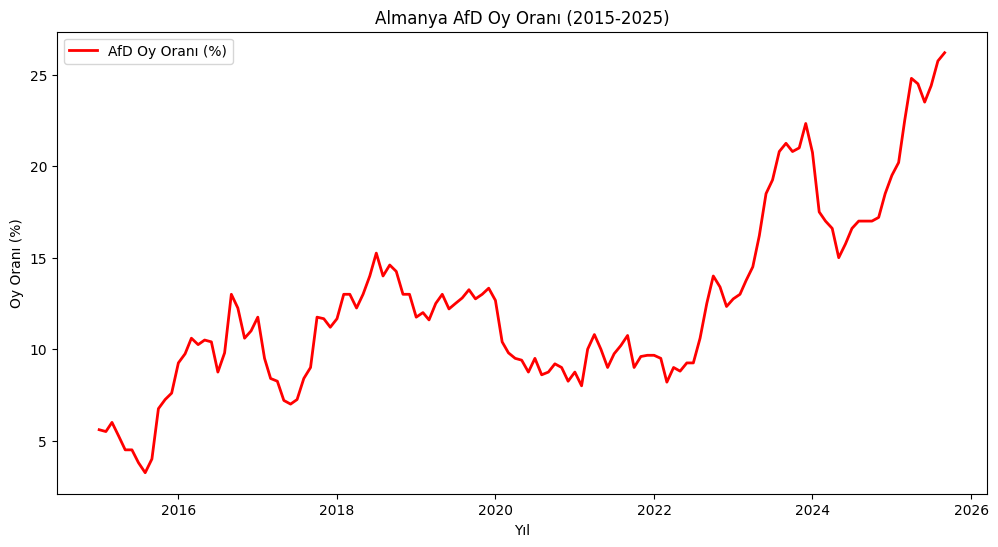

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Veriyi yükle ve tarihi düzenle
df = pd.read_csv('germany_final_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])

# 1. ZAMAN SERİSİ GRAFİĞİ
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['AfD_Vote_Rate'], label='AfD Oy Oranı (%)', color='red', linewidth=2)
plt.title('Almanya AfD Oy Oranı (2015-2025)')
plt.xlabel('Yıl')
plt.ylabel('Oy Oranı (%)')
plt.legend()
plt.savefig('time_series_afd_trend.png')
# ... (Diğer kodlar)

/tmp/ipython-input-1530915464.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AfD_Trend_Period', y='HICP', data=df, palette='viridis')


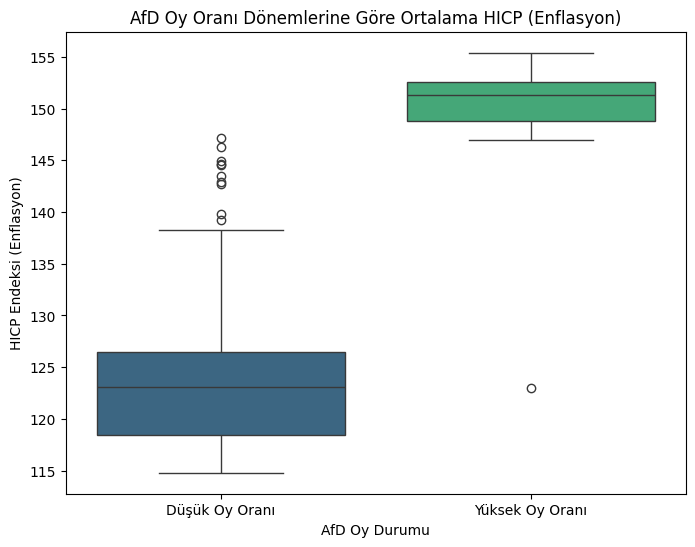

In [18]:
# ... (Önceki kodlardan devam)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Veriyi yükle ve tarihi düzenle
df = pd.read_csv('germany_final_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
# Kutu Grafiği için %15 eşiğinde kategori oluşturma
afd_threshold = 15.0
df['AfD_Trend_Period'] = ['Yüksek Oy Oranı' if rate >= afd_threshold else 'Düşük Oy Oranı'
                             for rate in df['AfD_Vote_Rate']]

# 3. KUTU GRAFİĞİ (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='AfD_Trend_Period', y='HICP', data=df, palette='viridis')
plt.title('AfD Oy Oranı Dönemlerine Göre Ortalama HICP (Enflasyon)')
plt.xlabel('AfD Oy Durumu')
plt.ylabel('HICP Endeksi (Enflasyon)')
plt.savefig('boxplot_hicp_by_afd_period.png')
# ... (Diğer kodlar)